In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/clean-application-train/clean_application_train.csv
/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/joining-home-credit/installments_and_credit_card.csv
/kaggle/input/joining-home-credit/summarized_credit_balance.csv
/kaggle/input/joining-home-credit/summarized_installments_payments.csv
/kaggle/input/joining-home-credit/final_prev.csv


In [2]:
path = '/kaggle/input/home-credit-default-risk/'
bureau_df = pd.read_csv(path + 'bureau.csv')
bureau_balance_df = pd.read_csv(path + 'bureau_balance.csv')

In [3]:
bb_unique_df = bureau_balance_df.groupby('SK_ID_BUREAU').agg({'MONTHS_BALANCE':'mean'})
bb_unique_df.head()

,MONTHS_BALANCE
SK_ID_BUREAU,
5001709,-48.0
5001710,-41.0
5001711,-1.5
5001712,-9.0
5001713,-10.5


#### Merge Bureau Balance and Bureau

In [4]:
bureau_merge = pd.merge(bureau_df, bb_unique_df, how='left', on='SK_ID_BUREAU')
bureau_merge.shape

(1716428, 18)

Text(0.5, 1.0, 'Correlation plot between numerical features')

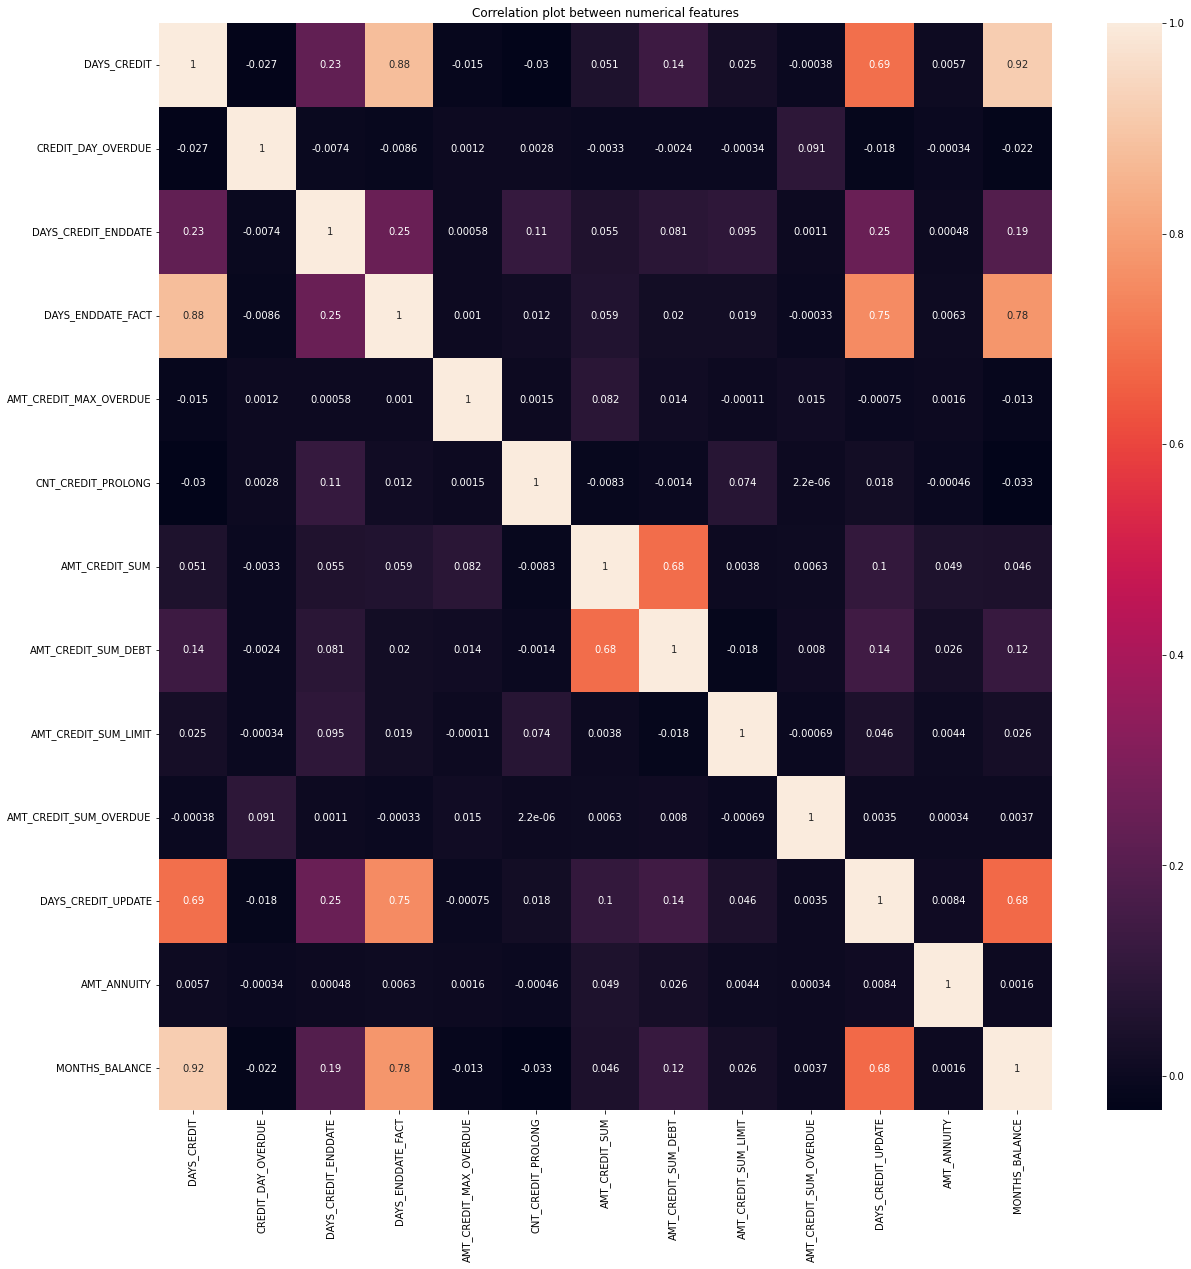

In [5]:
num_features_df = bureau_merge.select_dtypes(exclude='object')
corr = num_features_df.drop(['SK_ID_BUREAU', 'SK_ID_CURR'], axis=1).corr()
plt.figure(figsize = (20, 20))
corr_plot = sns.heatmap(corr, annot = True)
plt.title("Correlation plot between numerical features")

In [6]:
print(f"percentage of each value in CREDIT_DAY_OVERDUE:\n {bureau_df['CREDIT_DAY_OVERDUE'].value_counts(normalize=True) * 100}")
print(f"percentage of each value in CNT_CREDIT_PROLONG:\n {bureau_df['CNT_CREDIT_PROLONG'].value_counts(normalize=True) * 100}")
print(f"percentage of each value in AMT_CREDIT_SUM_OVERDUE:\n {bureau_df[ 'AMT_CREDIT_SUM_OVERDUE'].value_counts(normalize=True) * 100}")
print(f"percentage of each value in CREDIT_CURRENCY:\n {bureau_df[ 'CREDIT_CURRENCY'].value_counts(normalize=True) * 100}")

percentage of each value in CREDIT_DAY_OVERDUE:
 0       99.754315
30       0.018119
60       0.007341
8        0.006001
13       0.006001
          ...    
1445     0.000058
278      0.000058
707      0.000058
2193     0.000058
1931     0.000058
Name: CREDIT_DAY_OVERDUE, Length: 942, dtype: float64
percentage of each value in CNT_CREDIT_PROLONG:
 0    99.469014
1     0.443945
2     0.071194
3     0.011128
4     0.003146
5     0.001223
9     0.000117
6     0.000117
8     0.000058
7     0.000058
Name: CNT_CREDIT_PROLONG, dtype: float64
percentage of each value in AMT_CREDIT_SUM_OVERDUE:
 0.000       99.757753
4.500        0.017536
9.000        0.006234
13.500       0.004719
18.000       0.004195
              ...    
323.010      0.000058
88.695       0.000058
142.830      0.000058
5069.070     0.000058
352.620      0.000058
Name: AMT_CREDIT_SUM_OVERDUE, Length: 1616, dtype: float64
percentage of each value in CREDIT_CURRENCY:
 currency 1    99.917969
currency 2     0.071311
currency 3 

### Comment:
- CREDIT_DAY_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM_OVERDUE: the percentage of 0 value more than 99% -> drop these columns
- Almost values in CREDIT_CURRENCY column is currency 1 (nearly 100%) -> drop column

In [7]:
bureau_clean_df = bureau_df.drop(['CREDIT_DAY_OVERDUE', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_CURRENCY'], axis = 1)
bureau_clean_df

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,-497,-153.0,-153.0,NaN,91323.00,0.0,NaN,Consumer credit,-131,NaN
1,215354,5714463,Active,-208,1075.0,NaN,NaN,225000.00,171342.0,NaN,Credit card,-20,NaN
2,215354,5714464,Active,-203,528.0,NaN,NaN,464323.50,NaN,NaN,Consumer credit,-16,NaN
3,215354,5714465,Active,-203,NaN,NaN,NaN,90000.00,NaN,NaN,Credit card,-16,NaN
4,215354,5714466,Active,-629,1197.0,NaN,77674.5,2700000.00,NaN,NaN,Consumer credit,-21,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,-44,-30.0,NaN,0.0,11250.00,11250.0,0.0,Microloan,-19,NaN
1716424,100044,5057754,Closed,-2648,-2433.0,-2493.0,5476.5,38130.84,0.0,0.0,Consumer credit,-2493,NaN
1716425,100044,5057762,Closed,-1809,-1628.0,-970.0,NaN,15570.00,NaN,NaN,Consumer credit,-967,NaN
1716426,246829,5057770,Closed,-1878,-1513.0,-1513.0,NaN,36000.00,0.0,0.0,Consumer credit,-1508,NaN


From the correlation matrix, we can see that:
- high correlation exists between DAYS_CREDIT and DAYS_ENDDATE_FACT > 0.8% -> drop these 2 columns
- high correlation exists between DAYS_CREDIT and MONTHS_BALANCE > 0.9% -> drop these 2 columns

In [8]:
bureau_clean_df = bureau_clean_df.drop(['DAYS_CREDIT', 'DAYS_ENDDATE_FACT'], axis = 1)
bureau_clean_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,-153.0,NaN,91323.0,0.0,NaN,Consumer credit,-131,NaN
1,215354,5714463,Active,1075.0,NaN,225000.0,171342.0,NaN,Credit card,-20,NaN
2,215354,5714464,Active,528.0,NaN,464323.5,NaN,NaN,Consumer credit,-16,NaN
3,215354,5714465,Active,NaN,NaN,90000.0,NaN,NaN,Credit card,-16,NaN
4,215354,5714466,Active,1197.0,77674.5,2700000.0,NaN,NaN,Consumer credit,-21,NaN


#### Add feature
DEBT OVER CREDIT RATIO
The Ratio of Total Debt to Total Credit for each Customer.
A High value may be a red flag indicative of potential default

In [9]:
grp1 = bureau_clean_df[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = bureau_clean_df[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

bureau_clean_df = bureau_clean_df.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
bureau_clean_df= bureau_clean_df.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2

bureau_clean_df['DEBT_OVER_CREDIT'] = bureau_clean_df['TOTAL_CUSTOMER_DEBT']/bureau_clean_df['TOTAL_CUSTOMER_CREDIT']
bureau_clean_df.drop(['TOTAL_CUSTOMER_DEBT', 'TOTAL_CUSTOMER_CREDIT'], axis=1)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,DEBT_OVER_CREDIT
0,215354,5714462,Closed,-153.0,NaN,91323.00,0.0,NaN,Consumer credit,-131,NaN,0.047617
1,215354,5714463,Active,1075.0,NaN,225000.00,171342.0,NaN,Credit card,-20,NaN,0.047617
2,215354,5714464,Active,528.0,NaN,464323.50,NaN,NaN,Consumer credit,-16,NaN,0.047617
3,215354,5714465,Active,NaN,NaN,90000.00,NaN,NaN,Credit card,-16,NaN,0.047617
4,215354,5714466,Active,1197.0,77674.5,2700000.00,NaN,NaN,Consumer credit,-21,NaN,0.047617
...,...,...,...,...,...,...,...,...,...,...,...,...
1716423,259355,5057750,Active,-30.0,0.0,11250.00,11250.0,0.0,Microloan,-19,NaN,0.171099
1716424,100044,5057754,Closed,-2433.0,5476.5,38130.84,0.0,0.0,Consumer credit,-2493,NaN,0.492667
1716425,100044,5057762,Closed,-1628.0,NaN,15570.00,NaN,NaN,Consumer credit,-967,NaN,0.492667
1716426,246829,5057770,Closed,-1513.0,NaN,36000.00,0.0,0.0,Consumer credit,-1508,NaN,0.189369


NUMBER OF PAST LOANS PER CUSTOMER

In [10]:
grp = bureau_clean_df[['SK_ID_CURR', 'SK_ID_BUREAU']].groupby(by = ['SK_ID_CURR'])['SK_ID_BUREAU'].count().reset_index().rename(columns={'SK_ID_BUREAU': 'BUREAU_LOAN_COUNT'})
bureau_clean_df = bureau_clean_df.merge(grp, on = ['SK_ID_CURR'], how = 'left')

Unique SK_ID_CURR 

In [11]:
num_agg = {}
num_col = bureau_clean_df.drop(['SK_ID_CURR', 'SK_ID_BUREAU'], axis = 1).select_dtypes(exclude='object').columns
for i in num_col:
    num_agg[i] = 'mean'

In [12]:
bureau_clean_df = bureau_clean_df.groupby('SK_ID_CURR', as_index=False).agg({**num_agg})
bureau_clean_df

,SK_ID_CURR,DAYS_CREDIT_ENDDATE,AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TOTAL_CUSTOMER_DEBT,TOTAL_CUSTOMER_CREDIT,DEBT_OVER_CREDIT,BUREAU_LOAN_COUNT
0,100001,82.428571,NaN,2.076236e+05,85240.928571,0.00000,-93.142857,3545.357143,596686.500,1453365.000,0.410555,7.0
1,100002,-349.000000,1681.029,1.081319e+05,49156.200000,7997.14125,-499.875000,0.000000,245781.000,865055.565,0.284122,8.0
2,100003,-544.500000,0.000,2.543501e+05,0.000000,202500.00000,-816.000000,NaN,0.000,1017400.500,0.000000,4.0
3,100004,-488.500000,0.000,9.451890e+04,0.000000,0.00000,-532.000000,NaN,0.000,189037.800,0.000000,2.0
4,100005,439.333333,0.000,2.190420e+05,189469.500000,0.00000,-54.333333,1420.500000,568408.500,657126.000,0.864992,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
305806,456249,-1232.333333,6147.000,2.841430e+05,16307.100000,0.00000,-1064.538462,NaN,163071.000,3693858.660,0.044147,13.0
305807,456250,1288.333333,0.000,1.028820e+06,744013.365000,19422.79500,-60.333333,154567.965000,2232040.095,3086459.550,0.723172,3.0
305808,456253,280.500000,NaN,9.900000e+05,448958.250000,0.00000,-253.250000,58369.500000,1795833.000,3960000.000,0.453493,4.0
305809,456254,-859.000000,NaN,4.500000e+04,0.000000,NaN,-401.000000,0.000000,0.000,45000.000,0.000000,1.0


### Merge Bureau with Application Train

In [13]:
clean_application_train = pd.read_csv('/kaggle/input/clean-application-train/clean_application_train.csv')

In [14]:
bureau_clean_df.rename(columns={'AMT_ANNUITY': 'AMT_ANNUITY_Bureau'}, inplace=True)

In [15]:
app_train_merge = pd.merge(clean_application_train,bureau_clean_df, how='left', on='SK_ID_CURR')
app_train_merge.shape

(307511, 99)

In [16]:
app_train_merge.to_csv("app_train_merge_bureau.csv")

In [17]:
final_prev = pd.read_csv('/kaggle/input/joining-home-credit/final_prev.csv')
final_prev = final_prev.drop("Unnamed: 0", axis = 1)

In [18]:
final_prev

,NUM_INSTALMENT_VERSION_mean_installment,NUM_INSTALMENT_NUMBER_mean_installment,DAYS_INSTALMENT_mean_installment,DAYS_ENTRY_PAYMENT_mean_installment,AMT_INSTALMENT_mean_installment,AMT_PAYMENT_mean_installment,balance_mean_installment,late_payment_installment,SK_DPD_avg_credit_card,SK_DPD_DEF_avg_credit_card,...,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-37.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-177.0,1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-351.0,0.0
1670210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1297.0,0.0
1670211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1181.0,0.0
1670212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-817.0,1.0


In [19]:
final_merged_table = app_train_merge.merge(final_prev, on='SK_ID_CURR', how = "left")
final_merged_table = final_merged_table.drop("Unnamed: 0", axis = 1)

In [20]:
final_merged_table.to_csv("final_merged_table.csv")